data extraction

In [4]:
import zipfile
import numpy as np
import os
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt
import shutil
import re

In [48]:
# Define the path to the zip file and the extraction directory
zip_path = './archive.zip'
extract_to = './data/'

# Delete the contents of the extraction directory if it exists
if os.path.exists(extract_to):
    for filename in os.listdir(extract_to):
        file_path = os.path.join(extract_to, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print(f'Failed to delete {file_path}. Reason: {e}')

# Create extraction directory if it doesn't exist
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)
    
print('Extraction complete')

Extraction complete


extension check

In [2]:
# Define the root directory to start the search
root_dir = './data/'

# Flag to indicate if a non '.jpg' image is found
non_jpg_found = False

# Walk through the directory tree
for dirpath, dirnames, filenames in os.walk(root_dir):
    for filename in filenames:
        # Check if the file is an image
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            # Check if the image is not in the '.jpg' format
            if not filename.lower().endswith('.jpg'):
                print(f"Image file is not in the '.jpg' format: {os.path.join(dirpath, filename)}")
                non_jpg_found = True

# If no non '.jpg' images were found, print a message acknowledging that fact
if not non_jpg_found:
    print("All images are in the '.jpg' format.")

All images are in the '.jpg' format.


changing names for git

In [ ]:
# Define the maximum length for a Git file name and file path
GIT_MAX_FILE_NAME_LENGTH = 100
GIT_MAX_FILE_PATH_LENGTH = 4096

# Define the root directory to start the search
root_dir = './data/'

# Walk through the directory tree
for dirpath, dirnames, filenames in os.walk(root_dir):
    # Extract all the integer numbers from the filenames in the current directory
    numbers = [int(re.search(r'(\d+)', filename).group(1)) for filename in filenames if re.search(r'(\d+)', filename)]

    # If there are no numbers, start from 0
    if not numbers:
        next_number = 0
    else:
        next_number = max(numbers) + 1

    for filename in filenames:
        # Construct the full file path
        file_path = os.path.join(dirpath, filename)

        # Check if the file name or the file path is too long for Git
        if len(filename) > GIT_MAX_FILE_NAME_LENGTH or len(file_path) > GIT_MAX_FILE_PATH_LENGTH:
            # Construct the new file name
            new_file_name = f"{next_number}.jpg"

            # Construct the new file path
            new_file_path = os.path.join(dirpath, new_file_name)

            # Print the old and new file names
            print(f"Renaming file {file_path} to {new_file_path}")

            # Rename the file
            os.rename(file_path, new_file_path)

            # Increment the next number
            next_number += 1

dimension check

In [51]:
from collections import Counter

# List to store the dimensions of the images
widths = []
heights = []
dimensions = []

# Counter for processed images
processed_images = 0

# Walk through the directory tree
for dirpath, dirnames, filenames in os.walk(extract_to):
    for filename in filenames:
        # Check if the file is an image (you might need to adjust this depending on your image formats)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Construct the full file path
            img_path = os.path.join(dirpath, filename)

            # Open the image and get its dimensions
            try:
                with Image.open(img_path) as img:
                    width, height = img.size
                    widths.append(width)
                    heights.append(height)
                    dimensions.append(img.size)
                    
                    # Increment the counter for processed images
                    processed_images += 1
                    
                    # Print the number of processed images
                    # print(f"Processed images: {processed_images}")
            except IOError:
                print(f"Cannot open image file '{img_path}', skipping.")

# Get the distribution of the dimensions
dimension_distribution = Counter(dimensions)

# Print the distribution
for dim, count in dimension_distribution.items():
   print(f"Dimensions: {dim}, Count: {count}")

Dimensions: (640, 427), Count: 28
Dimensions: (750, 583), Count: 1
Dimensions: (468, 625), Count: 1
Dimensions: (650, 512), Count: 1
Dimensions: (876, 818), Count: 1
Dimensions: (500, 334), Count: 22
Dimensions: (1100, 1650), Count: 1
Dimensions: (290, 201), Count: 1
Dimensions: (600, 600), Count: 53
Dimensions: (625, 833), Count: 1
Dimensions: (540, 900), Count: 1
Dimensions: (403, 603), Count: 1
Dimensions: (215, 162), Count: 2
Dimensions: (500, 400), Count: 4
Dimensions: (640, 480), Count: 132
Dimensions: (500, 750), Count: 3
Dimensions: (620, 486), Count: 1
Dimensions: (630, 340), Count: 1
Dimensions: (400, 266), Count: 5
Dimensions: (1024, 644), Count: 1
Dimensions: (1000, 669), Count: 19
Dimensions: (1023, 731), Count: 1
Dimensions: (850, 638), Count: 1
Dimensions: (350, 270), Count: 4
Dimensions: (800, 450), Count: 71
Dimensions: (800, 600), Count: 1385
Dimensions: (239, 166), Count: 1
Dimensions: (800, 534), Count: 44
Dimensions: (365, 365), Count: 1
Dimensions: (640, 506), Cou

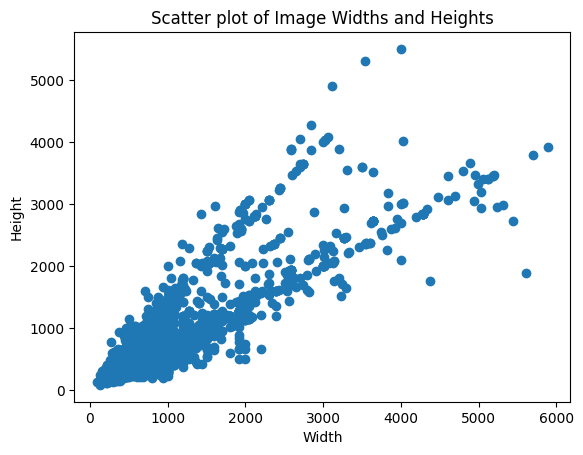

In [56]:
# Scatter plot of widths and heights
plt.scatter(widths, heights)
plt.title('Scatter plot of Image Widths and Heights')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

# Plot a histogram of the widths
plt.hist(widths, bins=len(set(widths)))
plt.title('Image Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.show()

# Plot a histogram of the heights
plt.hist(heights, bins=len(set(heights)))
plt.title('Image Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

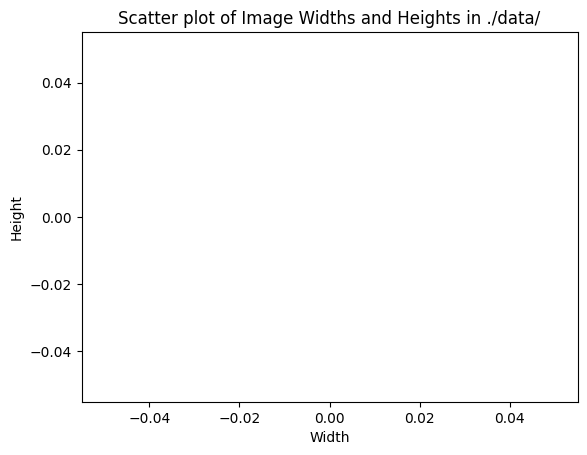

ValueError: `bins` must be positive, when an integer

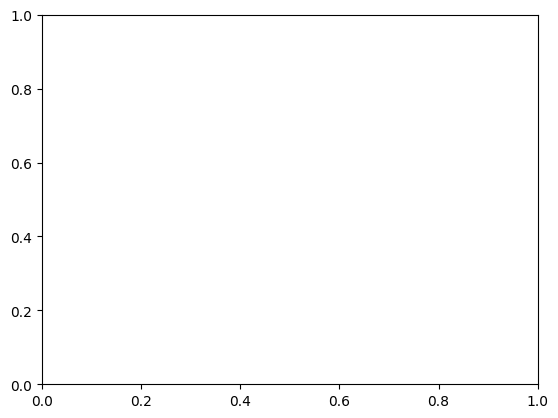

In [57]:
# Walk through the directory tree
for dirpath, dirnames, filenames in os.walk(extract_to):
    # Lists to store the dimensions of the images in the current directory
    widths = []
    heights = []
    dimensions = []

    for filename in filenames:
        # Check if the file is an image (you might need to adjust this depending on your image formats)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Construct the full file path
            img_path = os.path.join(dirpath, filename)

            # Open the image and get its dimensions
            try:
                with Image.open(img_path) as img:
                    width, height = img.size
                    widths.append(width)
                    heights.append(height)
                    dimensions.append(img.size)
            except IOError:
                print(f"Cannot open image file '{img_path}', skipping.")

    # Scatter plot of widths and heights for the current directory
    plt.scatter(widths, heights)
    plt.title(f'Scatter plot of Image Widths and Heights in {dirpath}')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.show()

    # Histogram of the widths for the current directory
    plt.hist(widths, bins=len(set(widths)))
    plt.title(f'Image Width Distribution in {dirpath}')
    plt.xlabel('Width')
    plt.ylabel('Frequency')
    plt.show()

    # Histogram of the heights for the current directory
    plt.hist(heights, bins=len(set(heights)))
    plt.title(f'Image Height Distribution in {dirpath}')
    plt.xlabel('Height')
    plt.ylabel('Frequency')
    plt.show()

bit range distribution

Image resizing

In [ ]:
# def resize_image(image_path, target_size):
#     try:
#         with Image.open(image_path) as img:
#             img = img.resize(target_size, Image.LANCZOS)  # Use the LANCZOS filter
#             img = img.convert('RGB')  # Convert RGBA images to RGB
#         return img
#     except UnidentifiedImageError:
#         print(f"Cannot identify image file '{image_path}', skipping.")
#         return None
# 
# # Target size
# target_size = (64, 64)
# 
# # Walk through the directory tree
# for dirpath, dirnames, filenames in os.walk(extract_to):
#     for filename in filenames:
#         # Check if the file is an image (you might need to adjust this depending on your image formats)
#         if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
#             # Construct the full file path
#             img_path = os.path.join(dirpath, filename)
#             
#             # Load and resize the image
#             img = resize_image(img_path, target_size)
# 
#             # Save the resized image back to the file (overwrites the original image)
#             if img is not None:
#                 img.save(img_path)

Pixel normalization

In [ ]:
# def normalize_and_save_image(image_path):
#     # Open the image file
#     try:
#         with Image.open(image_path) as img:
#             # Convert the image data to a numpy array
#             img_array = np.array(img)
#     
#             # Normalize the image data
#             normalized_img_array = img_array / 255.0
#     
#             # Convert normalized data back to an image and save
#             normalized_img = Image.fromarray((normalized_img_array * 255).astype(np.uint8))
#             normalized_img.save(image_path)
#             return img
#     except UnidentifiedImageError:
#         print(f"Cannot identify image file '{image_path}', skipping.")
#         return None
# 
# # Walk through the directory tree
# for dirpath, dirnames, filenames in os.walk(extract_to):
#     for filename in filenames:
#         # Check if the file is an image (you might need to adjust this depending on your image formats)
#         if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
#             # Construct the full file path
#             img_path = os.path.join(dirpath, filename)
# 
#             # Normalize and save the image
#             normalize_and_save_image(img_path)